Let's say you're developing your software product. Some of your customers are already paying for it. Some don't. You want to create a promotional campaign and offer discount codes to some customers that might increase their purchases. Which customers should you choose?

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.special import expit
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 6

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

# Data Setup

You collected some data from your database(s), analytics packages, etc. Here's what you might've come up with:

In [0]:
data = OrderedDict(
        amount_spent =  [50,  10, 20, 5,  95,  70,  100,  200, 0],
        send_discount = [0,   1,  1,  1,  0,   0,   0,    0,   1]
    )

In [14]:
df = pd.DataFrame.from_dict(data)
df

,amount_spent,send_discount
0,50,0
1,10,1
2,20,1
3,5,1
4,95,0
5,70,0
6,100,0
7,200,0
8,0,1


You just found [pandas](https://pandas.pydata.org/), (yet) another library that will help you deal with data. Let's use it:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


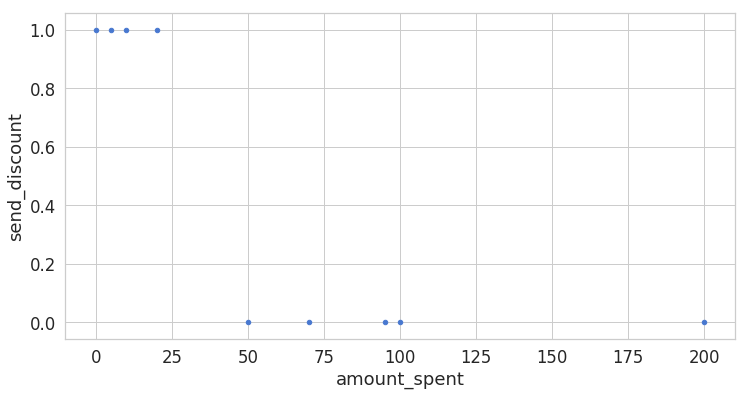

In [15]:
df.plot.scatter(x='amount_spent', y='send_discount');

In [0]:
X = df['amount_spent'].values.astype('float32')
y = df['send_discount'].values.astype('int8')

# Sigmoid

In [0]:
def sigmoid(z):
#   return 1 / (1 + np.exp(-z))
  return expit(z)

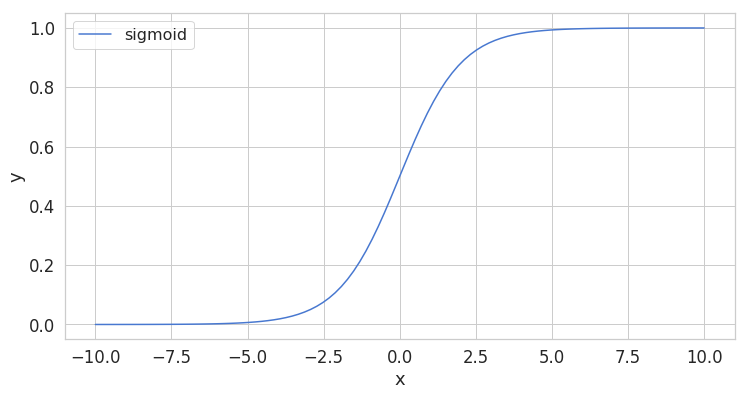

In [18]:
x = np.linspace(-10., 10., num=100)
sig = sigmoid(x)

plt.plot(x, sig, label="sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(prop={'size' : 16})
plt.show()

# Model

In [0]:
def cross_entropy_loss(h, y):
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [0]:
class LogisticRegression:
  
  def __init__(self, loss):
    self.loss = loss

  def fit(self, X, y, n_iter=1000, lr=0.01):
    X = self._add_intercept(X)
    self._W = np.zeros(X.shape[1])

    for i in range(n_iter):
      z = np.dot(X, self._W)
      h = sigmoid(z)

      gradient = np.dot(X.T, (h - y)) / y.size
      self._W -= lr * gradient

      if i % 100 == 0:
        e = self.loss(h, y)
        print(f'iter: {i} - loss: {e} \t')

    return self
    
  def predict(self, X):
    X = self._add_intercept(X)
    return sigmoid(np.dot(X, self._W))
  
  def _add_intercept(self, X):
    X = X.reshape(X.shape[0], 1)
    intercept = np.ones(X.shape)
    return np.concatenate((intercept, X), axis=1)

# Testing

In [0]:
X_test = np.array([10, 250])
X_test = X_test.reshape(X_test.shape[0], 1)

In [22]:
regressor = LogisticRegression(cross_entropy_loss)
y_test = regressor.fit(X, y).predict(X_test)
print(y_test)

iter: 0 - loss: 0.6931471805599453 	
iter: 100 - loss: 0.37449725541948514 	
iter: 200 - loss: 0.33782253027627085 	
iter: 300 - loss: 0.30677432628961104 	
iter: 400 - loss: 0.28036667739326376 	
iter: 500 - loss: 0.25777734702838845 	
iter: 600 - loss: 0.23833215685081427 	
iter: 700 - loss: 0.2214836079446638 	
iter: 800 - loss: 0.20678902816441125 	
iter: 900 - loss: 0.19389077343983344 	
[7.03971152e-01 5.34265632e-07]
